# Provide regridded landfrac for ne120 simulations

This will be used for a land/ocean mask on the regridded output

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
ds = xr.open_dataset('/global/project/projectdirs/m3312/crjones/e3sm/early_science/monthly_hist/clim_rgr/0001-0001/earlyscience.FC5AV1C-H01A.ne120.sp1_64x1_1000m_ANN_000101_000112_climo.nc')
ds

<xarray.Dataset>
Dimensions:          (ilev: 73, lat: 720, lev: 72, lon: 1440, nbnd: 2, time: 1)
Coordinates:
  * lat              (lat) float64 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon              (lon) float64 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * ilev             (ilev) float64 0.1 0.1477 0.218 ... 990.5 997.0 1e+03
  * lev              (lev) float64 0.1238 0.1828 0.2699 ... 986.2 993.8 998.5
  * time             (time) object 0001-08-11 06:00:00
Dimensions without coordinates: nbnd
Data variables:
    lat_bnds         (lat, nbnd) float64 ...
    lon_bnds         (lon, nbnd) float64 ...
    gw               (lat) float64 ...
    area             (lat, lon) float64 ...
    frac_b           (lat, lon) float64 ...
    AEROD_v          (time, lat, lon) float32 ...
    ANRAIN           (time, lev, lat, lon) float32 ...
    ANSNOW           (time, lev, lat, lon) float32 ...
    AOD400           (time, lat, lon) float32 ...
    AOD700           (time, lat, lon) float

In [4]:
da = ds['LANDFRAC'].squeeze().drop('time')

In [5]:
da

<xarray.DataArray 'LANDFRAC' (lat: 720, lon: 1440)>
[1036800 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Attributes:
    units:          fraction
    long_name:      Fraction of sfc area covered by land
    cell_methods:   time: mean
    cell_measures:  area: area

(array([668151.,   3838.,   3359.,   3084.,   2752.,   2854.,   3181.,
          3027.,   3808., 342746.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <a list of 10 Patch objects>)

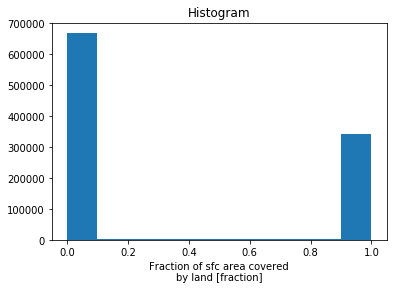

In [15]:
da.plot.hist()

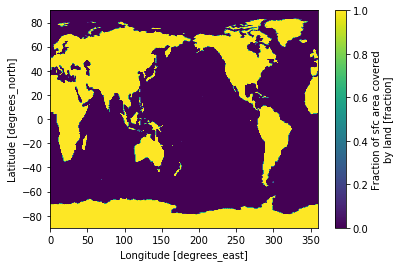

In [16]:
da.plot()

In [6]:
ds_out = da.to_dataset()
ds_out.attrs.update({k: ds.attrs[k] for k in ['case', 'map_file', 'input_file']})
ds_out.attrs

OrderedDict([('case',
              'earlyscience.FC5AV1C-H01A.ne120.sp1_64x1_1000m.20190222'),
             ('map_file',
              '/global/homes/z/zender/data/maps/map_ne120np4_to_cmip6_720x1440_aave.20181001.nc'),
             ('input_file',
              'earlyscience.FC5AV1C-H01A.ne120.sp1_64x1_1000m_ANN_000101_000112_climo.nc')])

In [24]:
# write landfrac to netcdf
# note: it would be better to write these to the dataset instead
# da.attrs.update({k: ds.attrs[k] for k in ['case', 'map_file', 'input_file']})
# da.attrs

OrderedDict([('units', 'fraction'),
             ('long_name', 'Fraction of sfc area covered by land'),
             ('cell_methods', 'time: mean'),
             ('cell_measures', 'area: area'),
             ('case',
              'earlyscience.FC5AV1C-H01A.ne120.sp1_64x1_1000m.20190222'),
             ('map_file',
              '/global/homes/z/zender/data/maps/map_ne120np4_to_cmip6_720x1440_aave.20181001.nc'),
             ('input_file',
              'earlyscience.FC5AV1C-H01A.ne120.sp1_64x1_1000m_ANN_000101_000112_climo.nc')])

In [7]:
ds_out.to_netcdf('/global/project/projectdirs/m3312/crjones/e3sm/early_science/ne120_landfrac_720x1440.nc', mode='w')

In [8]:
ds = xr.open_dataset('/global/project/projectdirs/m3312/crjones/e3sm/early_science/ne120_landfrac_720x1440.nc')
ds

<xarray.Dataset>
Dimensions:   (lat: 720, lon: 1440)
Coordinates:
  * lat       (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon       (lon) float64 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    LANDFRAC  (lat, lon) float32 ...
Attributes:
    case:        earlyscience.FC5AV1C-H01A.ne120.sp1_64x1_1000m.20190222
    map_file:    /global/homes/z/zender/data/maps/map_ne120np4_to_cmip6_720x1...
    input_file:  earlyscience.FC5AV1C-H01A.ne120.sp1_64x1_1000m_ANN_000101_00...

In [9]:
ds['LANDFRAC'].attrs

OrderedDict([('units', 'fraction'),
             ('long_name', 'Fraction of sfc area covered by land'),
             ('cell_methods', 'time: mean'),
             ('cell_measures', 'area: area')])